# Applying XG_boost to wisconsin breast cancer dataset

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [76]:
# load data
dataset = pd.read_csv('breast-cancer.csv', delimiter=",")
print(dataset.shape)
dataset.drop_duplicates()
print(dataset.shape)
dataset.info()

(569, 33)
(569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se  

All of our data is numerical, except for diagnosis

In [77]:
#displaying data set
dataset.head()

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x11d6ffd30>>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x11d96d9e8>>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
#split dataset into x and y
X = dataset.drop(['id','Unnamed: 32','diagnosis'], axis=1)
y = dataset['diagnosis']

In [79]:
# check for missing values
# Display number of missing values by feature
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [80]:
# encode our diagnosis class values as integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

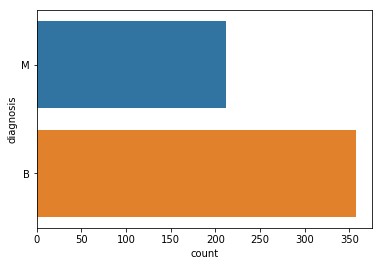

In [97]:
# check proportion of pos/neg diagnosis
sns.countplot(y='diagnosis', data=dataset)
%clear

In [81]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.25)

In [99]:
# train and fit our xgboost
from xgboost import XGBClassifier
xgboost = XGBClassifier()
# Monitoring Training Performance With XGBoost Early Stopping to Avoid Overfitting
eval_set = [(X_train, y_train), (X_test, y_test)]
xgboost.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set,
    verbose=True)

[0]	validation_0-error:0.021127	validation_0-logloss:0.60874	validation_1-error:0.062937	validation_1-logloss:0.615776
[1]	validation_0-error:0.018779	validation_0-logloss:0.538757	validation_1-error:0.062937	validation_1-logloss:0.552196
[2]	validation_0-error:0.018779	validation_0-logloss:0.481976	validation_1-error:0.055944	validation_1-logloss:0.498117
[3]	validation_0-error:0.016432	validation_0-logloss:0.432696	validation_1-error:0.062937	validation_1-logloss:0.45313
[4]	validation_0-error:0.016432	validation_0-logloss:0.389736	validation_1-error:0.055944	validation_1-logloss:0.41434
[5]	validation_0-error:0.016432	validation_0-logloss:0.351077	validation_1-error:0.048951	validation_1-logloss:0.379695
[6]	validation_0-error:0.014085	validation_0-logloss:0.31841	validation_1-error:0.048951	validation_1-logloss:0.351099
[7]	validation_0-error:0.014085	validation_0-logloss:0.288947	validation_1-error:0.048951	validation_1-logloss:0.325223
[8]	validation_0-error:0.014085	validation_0

[68]	validation_0-error:0.002347	validation_0-logloss:0.017328	validation_1-error:0.020979	validation_1-logloss:0.102511
[69]	validation_0-error:0.002347	validation_0-logloss:0.017004	validation_1-error:0.020979	validation_1-logloss:0.102658
[70]	validation_0-error:0.002347	validation_0-logloss:0.016659	validation_1-error:0.020979	validation_1-logloss:0.102894
[71]	validation_0-error:0	validation_0-logloss:0.016326	validation_1-error:0.020979	validation_1-logloss:0.101929
[72]	validation_0-error:0	validation_0-logloss:0.016006	validation_1-error:0.020979	validation_1-logloss:0.103027
[73]	validation_0-error:0	validation_0-logloss:0.015676	validation_1-error:0.020979	validation_1-logloss:0.102716
[74]	validation_0-error:0	validation_0-logloss:0.015394	validation_1-error:0.020979	validation_1-logloss:0.102662
[75]	validation_0-error:0	validation_0-logloss:0.015148	validation_1-error:0.020979	validation_1-logloss:0.102389
[76]	validation_0-error:0	validation_0-logloss:0.014928	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [100]:
#XGBoost Learning Curves For Log Loss    
def plot_logloss(results):
    x_axis = range(0, 50)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'][:50], label='Train') 
    ax.plot(x_axis, results['validation_1']['logloss'][:50], label='Test') 
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()


#XGBoost Learning Curves For Classification Error
def plot_classif_error(results):
    x_axis = range(0, 50)
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'][:50], label='Train') 
    ax.plot(x_axis, results['validation_1']['error'][:50], label='Test') 
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

In [83]:
# make predictions for test data
y_pred = model.predict_proba(X_test)
y_pred_pos = [pred[1] for pred in y_pred]
y_pred_pos[:5]

[0.97801489, 0.99501944, 0.0017546152, 0.99797457, 0.001200755]

In [102]:
# retrieve performance metrics to measure for early stoping
results = xgboost.evals_result()

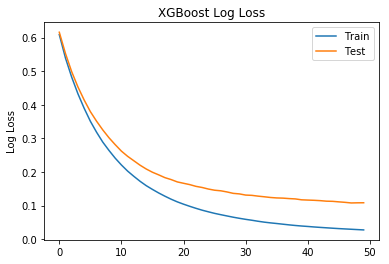

In [103]:
#plot log loss function
plot_logloss(results)

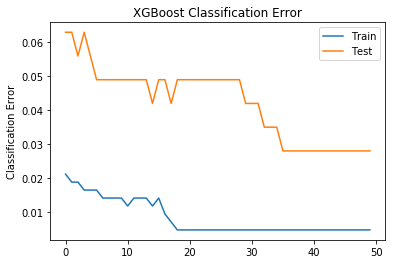

In [104]:
#plot log loss function
plot_classif_error(results)

# Area under ROC curve

We will use AUROC curve as our evaluation metric, it is strong for classification tasks.

Area under ROC curve is equivalent to the probability that a randomly chosen '0' observation ranks higher (has a higher predicted probability) than a randomly chosen '1' observation.

Since it's choosing one random positve and one random negative, it doesn't care about imbalanced classes.

In [84]:
#import metrics
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresh = roc_curve(y_test, y_pred_pos)

roc_curve() returns 3 lists of equal length:

1. False positive rates
2. True positive rates
3. And the thresholds at which the those were calculated.

In [85]:
# Store fpr, tpr, thresholds in DataFrame and display first 10
roc = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresh})
roc.head(10)

,FPR,TPR,Thresholds
0,0.000000,0.017544,0.999116
1,0.000000,0.912281,0.894106
2,0.011628,0.912281,0.875458
3,0.011628,0.964912,0.464480
4,0.139535,0.964912,0.079916
5,0.139535,0.982456,0.042150
6,0.232558,0.982456,0.008708
7,0.232558,1.000000,0.008379
8,1.000000,1.000000,0.000691


**Note**: For illness classfication, although we want to minimize false postive rate, but more importantly- for a cancer diagnosis- we want to err on the side of caution.. for further tests to precede. 

That is we'd rather allow some false positives for a 1.0 true positive rates, as long as there are no false negatives.

- Plotting our model's entire curve ROC curve to visualize the relationship between TPR (True Positive Rate) and FPR (False Positive Rate) across our model's threshold values
- also plotting ROC curve of a hypothetical model that makes completely random predictions for heuristic reasons (dashed line).

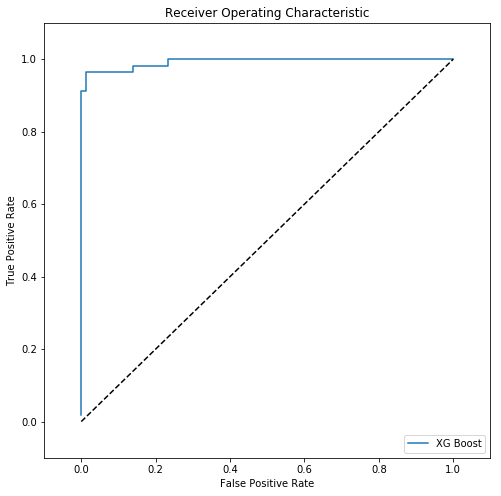

In [86]:
# Initialize figure
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='XG Boost')
plt.legend(loc='lower right')

# Diagonal 45 degree line
# ROC curve of a completely random model
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Calcualting Area underneath ROC curve (AUROC)**

In [98]:
# Calculate ROC curve again because repetition is the mother of learning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pos)
# Calculate AUROC
print( auc(fpr, tpr))

0.99286005712


###### Not much need to tune our hyperparameters, as our xgboost model does extremely well on this dataset

###### **NOTE**: Look at xgboost_diabetes for example of in-depth tuning of XGBoost model